# Clustering from the iris dataset

# Loading relevant libraries and dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris=pd.read_csv('datasets_19_420_Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Clustering on the basis of Petal length and Petal width

In [4]:
iris.drop(['SepalLengthCm','SepalWidthCm','Id'],axis=1)

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
5,1.7,0.4,Iris-setosa
6,1.4,0.3,Iris-setosa
7,1.5,0.2,Iris-setosa
8,1.4,0.2,Iris-setosa
9,1.5,0.1,Iris-setosa


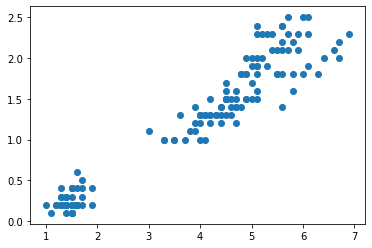

In [5]:
## Plotting the petal length and petal width
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'])

In [7]:
## Loading the KMeans model
km=KMeans()
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
## To find the optimal number of clusters that be used

kr=range(1,11)
sse=[]
for k in kr:
    km= KMeans(n_clusters=k)
    km.fit(iris[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [9]:
sse

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.48238901098901,
 13.933308757908758,
 11.052733877751727,
 9.285916390614219,
 8.011634881359797,
 6.496659206692712,
 5.674253191395135]

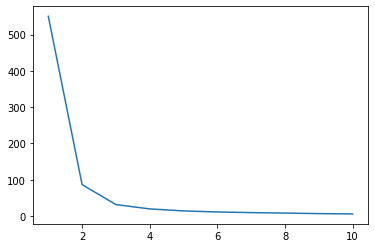

In [11]:
## This is the elbow method which selects the optimal number of clusters required 

plt.plot(kr,sse)

## The optimal no. of clusters for this problem is 3

In [12]:
## Setting the number of cluster to 3 and training the model
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
y_pred= km.fit_predict(iris[['PetalLengthCm','PetalWidthCm']])

In [14]:
iris['Cluster']=y_pred
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


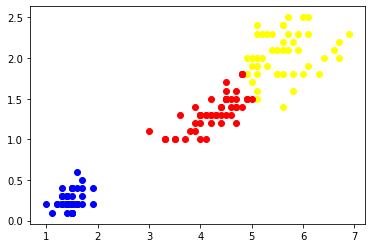

In [17]:
## Plotting the data according to the predicted cluster of the data
iris1=iris[iris.Cluster==1]
iris2=iris[iris.Cluster==0]
iris3=iris[iris.Cluster==2]
plt.scatter(iris1.PetalLengthCm,iris1.PetalWidthCm,color='yellow')
plt.scatter(iris2.PetalLengthCm,iris2.PetalWidthCm,color='blue')
plt.scatter(iris3.PetalLengthCm,iris3.PetalWidthCm,color='red')

In [18]:
## Centers of the cluster 
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])